In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
u1 = 66910.0
u2 = 115160.0
T1 = 547.7
T2 = 1485.1
theta0 = 0.0198
dy = 0.00625*2

eta = (u2-u1)/(u2+u1)
xpos = 300

In [3]:
# Simulations to plot
fstarts = ["vspdf/plt01000/", "smag/plt01000/", "wale/plt01000/", "pasr/plt01000", "no_model/plt01000/"]
fends   = ["vspdf/plt03000/", "smag/plt03000/", "wale/plt03000/", "pasr/plt03000", "no_model/plt03000/"]
flabels = ["VSPDF", "Smagorinsky", "WALE", "PaSR", "No model"]
fstyles = ['-', '-.', '--', ':', '-']

yt : [INFO     ] 2023-08-02 20:29:46,355 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:46,356 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:46,357 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:46,358 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:46,406 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:46,407 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:46,408 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:46,409 Parameters: domain_right_edge         = [6.4 1.2 1. ]


yt : [INFO     ] 2023-08-02 20:29:46,856 Parameters: current_time              = 0.000143555258851541
yt : [INFO     ] 2023-08-02 20:29:46,857 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:46,858 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:46,859 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:46,901 Parameters: current_time              = 0.000431239249967918
yt : [INFO     ] 2023-08-02 20:29:46,902 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:46,903 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:46,904 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:47,340 Parameters: current_time              = 0.000235509469769886
yt : [INFO     ] 2023-08-02 20:29:47,342 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:2

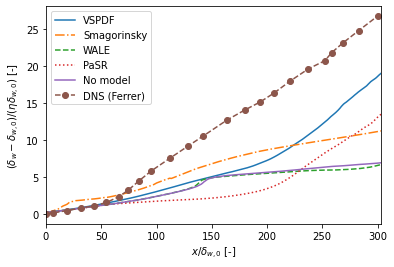

In [4]:
# Mixing layer thickness
def get_vort_thickness(fstart, fend):
  ds = yt.load(fstart)
  time_of_avg = float(ds.current_time)
  ds = yt.load(fend)
  time_of_avg = float(ds.current_time) - time_of_avg 
  
  fd_points = 3
  # fd_coef = [1/24, -27/24, 27/24, -1/24] # for fd_points = 2
  fd_coef = [-9/1920, 125/1920, -2250/1920, 2250/1920, -125/1920, 9/1920] # for fd_points = 3
  lineout = ds.ortho_ray(0, (0.00625, 0)) # take a line cut along the x axis
  srt = np.argsort(lineout["index", "x"])
  x = np.array(lineout["index", "x"][srt])
  dudy = np.zeros_like(x)

  for i in range(-fd_points, fd_points):
    lineout = ds.ortho_ray(0, (0.00625 + dy*i, 0))
    u = np.array(lineout["boxlib", "time_avg_u"][srt]) / time_of_avg
    dudy = dudy + fd_coef[i+fd_points] * u / dy
  return x, (u2-u1)/np.abs(dudy)

def plot_vort_thickness(fstart, fend, label, linestyle='-'):
  x, theta = get_vort_thickness(fstart, fend)

  plt.plot(x/theta0, (theta/theta0-1)/eta, linestyle, label=label)

# Normalised plot
plt.figure()
for i in range(len(fstarts)):
  plot_vort_thickness(fstarts[i], fends[i], flabels[i], fstyles[i])

# Plot reference
ref = np.loadtxt("ref_data/theta_w.dat", comments="#", delimiter=",")
ref = np.sort(ref, axis=0)
plt.plot(ref[:,0], ref[:,1], 'o--', label="DNS (Ferrer)")

plt.xlabel(r"$x/\delta_{w,0}$ [-]")
plt.ylabel(r"$(\delta_w - \delta_{w,0})/(\eta \delta_{w,0})$ [-]")
plt.xlim([0.0, 6.0/theta0])
plt.legend()

yt : [INFO     ] 2023-08-02 20:29:48,935 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:48,936 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:48,937 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:48,938 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:48,979 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:48,979 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:48,980 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:48,981 Parameters: domain_right_edge         = [6.4 1.2 1. ]


yt : [INFO     ] 2023-08-02 20:29:49,329 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:49,330 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:49,331 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:49,332 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:49,372 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:49,373 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:49,374 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:49,375 Parameters: domain_right_edge         = [6.4 1.2 1. ]
/tmp/ipykernel_1880433/3375122742.py:13: RuntimeWarning: invalid value encountered in sqrt
  rms_u = np.sqrt(np.array(lineout["boxlib", "mean_squared_u"][srt]) / time_of_avg - avg_u**2)
yt : [INFO     ] 2023-08-02 20:29:49,716

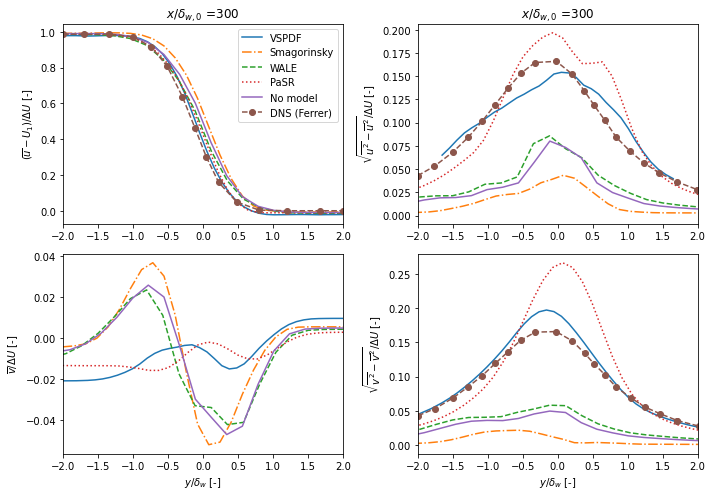

In [5]:
# Velocity statistics
def get_vel_stat(fstart, fend, xpos):
  ds = yt.load(fstart)
  time_of_avg = float(ds.current_time)
  ds = yt.load(fend)
  time_of_avg = float(ds.current_time) - time_of_avg 
  
  lineout = ds.ortho_ray(1, (0, xpos*theta0)) # take a line cut along the x axis
  srt = np.argsort(lineout["index", "y"])
  y = np.array(lineout["index", "y"][srt])
  avg_u = np.array(lineout["boxlib", "time_avg_u"][srt]) / time_of_avg
  avg_v = np.array(lineout["boxlib", "time_avg_v"][srt]) / time_of_avg
  rms_u = np.sqrt(np.array(lineout["boxlib", "mean_squared_u"][srt]) / time_of_avg - avg_u**2)
  rms_v = np.sqrt(np.array(lineout["boxlib", "mean_squared_v"][srt]) / time_of_avg - avg_v**2)

  return y, avg_u, avg_v, rms_u, rms_v

def plot_vel_stat(fstart, fend, xpos, theta, label, linestyle='-'):
  y, u, v, rms_u, rms_v = get_vel_stat(fstart, fend, xpos)

  du = u2-u1
  
  plt.subplot(2,2,1)
  plt.plot(y/theta, (u-u1)/du, linestyle, label=label)

  plt.subplot(2,2,2)
  plt.plot(y/theta, rms_u/du, linestyle, label=label)

  plt.subplot(2,2,3)
  plt.plot(y/theta, v/du, linestyle, label=label)

  plt.subplot(2,2,4)
  plt.plot(y/theta, rms_v/du, linestyle, label=label)

# Normalised plot using own theta
plt.figure(figsize=(10,7))

for i in range(len(fstarts)):
  x, theta = get_vort_thickness(fstarts[i], fends[i])
  ipos = np.argmax(x/theta0 >= xpos) # index where x/theta ~ xpos
  plot_vel_stat(fstarts[i], fends[i], xpos, theta[ipos], flabels[i], fstyles[i])

# Plot ref
ref_u = np.loadtxt(f"ref_data/meanu_{xpos}", comments="#", delimiter=",")
ref_u[:,1] = ref_u[:,1] - ref_u[-1,1]

ref_urms = np.loadtxt(f"ref_data/rmsu_{xpos}", comments="#", delimiter=",")
ref_vrms = np.loadtxt(f"ref_data/rmsv_{xpos}", comments="#", delimiter=",")

plt.subplot(2,2,1)
plt.plot(ref_u[:,0], ref_u[:,1], 'o--', label="DNS (Ferrer)")
plt.ylabel(r"$(\overline{u} - U_1)/\Delta U$ [-]")
plt.xlim([-2., 2.])
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))
plt.legend()

plt.subplot(2,2,2)
plt.plot(ref_urms[:,0], ref_urms[:,1], 'o--', label="DNS (Ferrer)")
plt.ylabel(r"$\sqrt{\overline{u^2} - \overline{u}^2}/\Delta U$ [-]")
plt.xlim([-2., 2.])
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

plt.subplot(2,2,3)
plt.xlabel(r"$y/\delta_w$ [-]")
plt.ylabel(r"$\overline{v}/\Delta U$ [-]")
plt.xlim([-2., 2.])

plt.subplot(2,2,4)
plt.plot(ref_vrms[:,0], ref_vrms[:,1], 'o--', label="DNS (Ferrer)")
plt.xlabel(r"$y/\delta_w$ [-]")
plt.ylabel(r"$\sqrt{\overline{v^2} - \overline{v}^2}/\Delta U$ [-]")
plt.xlim([-2., 2.])

plt.tight_layout()

yt : [INFO     ] 2023-08-02 20:29:53,378 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:53,379 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:53,380 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:53,381 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:53,424 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:53,425 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:53,426 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:53,427 Parameters: domain_right_edge         = [6.4 1.2 1. ]


/tmp/ipykernel_1880433/3375122742.py:13: RuntimeWarning: invalid value encountered in sqrt
  rms_u = np.sqrt(np.array(lineout["boxlib", "mean_squared_u"][srt]) / time_of_avg - avg_u**2)
yt : [INFO     ] 2023-08-02 20:29:53,906 Parameters: current_time              = 0.000143555258851541
yt : [INFO     ] 2023-08-02 20:29:53,907 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:53,908 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:53,909 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:53,953 Parameters: current_time              = 0.000431239249967918
yt : [INFO     ] 2023-08-02 20:29:53,954 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:53,955 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:53,956 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:54,234

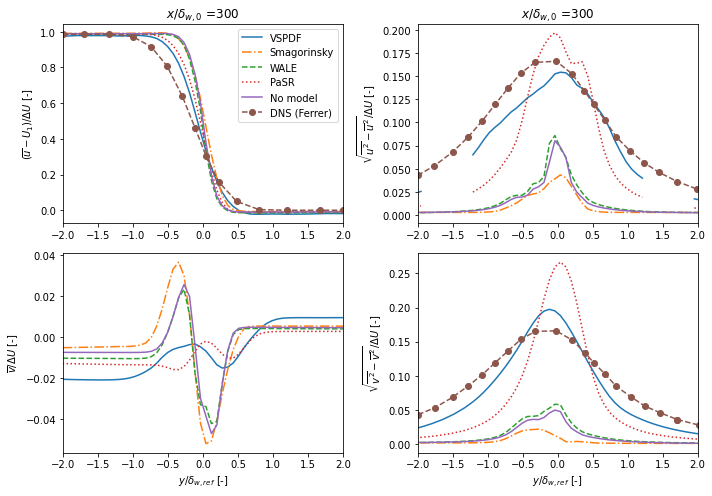

In [6]:
# Normalised plot using *ref* theta
plt.figure(figsize=(10,7))

tref = np.loadtxt("ref_data/theta_w.dat", comments="#", delimiter=",")
tref = np.sort(tref, axis=0)
theta = np.interp(xpos, tref[:,0], tref[:,1])*eta*theta0 + theta0

for i in range(len(fstarts)):
  plot_vel_stat(fstarts[i], fends[i], xpos, theta, flabels[i], fstyles[i])

# Plot ref
ref_u = np.loadtxt(f"ref_data/meanu_{xpos}", comments="#", delimiter=",")
ref_u[:,1] = ref_u[:,1] - ref_u[-1,1]

ref_urms = np.loadtxt(f"ref_data/rmsu_{xpos}", comments="#", delimiter=",")
ref_vrms = np.loadtxt(f"ref_data/rmsv_{xpos}", comments="#", delimiter=",")

plt.subplot(2,2,1)
plt.plot(ref_u[:,0], ref_u[:,1], 'o--', label="DNS (Ferrer)")
plt.ylabel(r"$(\overline{u} - U_1)/\Delta U$ [-]")
plt.xlim([-2., 2.])
plt.legend()
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

plt.subplot(2,2,2)
plt.plot(ref_urms[:,0], ref_urms[:,1], 'o--', label="DNS (Ferrer)")
plt.ylabel(r"$\sqrt{\overline{u^2} - \overline{u}^2}/\Delta U$ [-]")
plt.xlim([-2., 2.])
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

plt.subplot(2,2,3)
plt.xlabel(r"$y/\delta_{w, ref}$ [-]")
plt.ylabel(r"$\overline{v}/\Delta U$ [-]")
plt.xlim([-2., 2.])

plt.subplot(2,2,4)
plt.plot(ref_vrms[:,0], ref_vrms[:,1], 'o--', label="DNS (Ferrer)")
plt.xlabel(r"$y/\delta_{w, ref}$ [-]")
plt.ylabel(r"$\sqrt{\overline{v^2} - \overline{v}^2}/\Delta U$ [-]")
plt.xlim([-2., 2.])

plt.tight_layout()

yt : [INFO     ] 2023-08-02 20:29:55,833 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:55,833 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:55,834 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:55,835 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:55,878 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:55,878 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:55,879 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:55,880 Parameters: domain_right_edge         = [6.4 1.2 1. ]


yt : [INFO     ] 2023-08-02 20:29:56,225 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:29:56,226 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:56,227 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:56,228 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:56,269 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:29:56,270 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:29:56,271 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:29:56,272 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:29:56,585 Parameters: current_time              = 0.000143555258851541
yt : [INFO     ] 2023-08-02 20:29:56,586 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:2

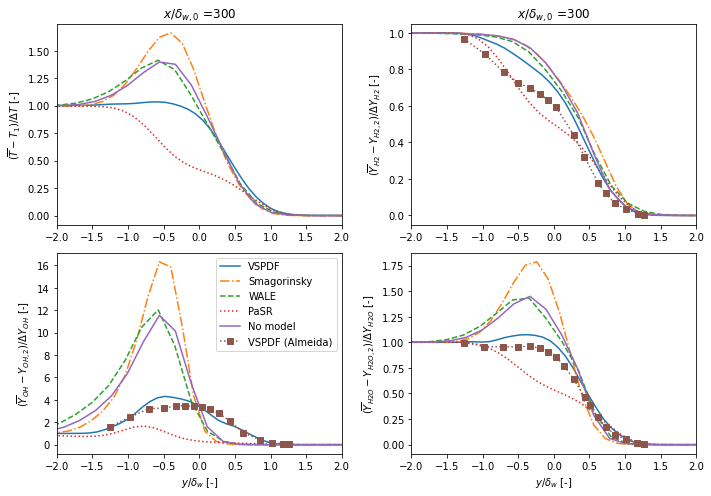

In [7]:
# Average T and Y
def get_avg_TY(fstart, fend, xpos, spec_names):
  ds = yt.load(fstart)
  time_of_avg = float(ds.current_time)
  ds = yt.load(fend)
  time_of_avg = float(ds.current_time) - time_of_avg 
  
  lineout = ds.ortho_ray(1, (0, xpos*theta0)) # take a line cut along the x axis
  srt = np.argsort(lineout["index", "y"])
  y = np.array(lineout["index", "y"][srt])
  avg_T = np.array(lineout["boxlib", "time_avg_T"][srt]) / time_of_avg
  avg_Y = []
  for spec in spec_names:
    avg_Y.append(np.array(lineout["boxlib", "time_avg_Y_"+spec][srt]) / time_of_avg)

  return y, avg_T, avg_Y

spec_names = ["H2", "OH", "H2O"]

def plot_TY(fstart, fend, xpos, theta, label, linestyle='-'):

  y, T, Y = get_avg_TY(fstart, fend, xpos, spec_names)

  plt.subplot(2,2,1)
  plt.plot(y/theta, (T-T1)/(T2-T1), linestyle, label=label)

  for i in range(len(spec_names)):
    dY = Y[i][0] - Y[i][-1]
    Y2 = Y[i][-1]

    if (spec_names[i] == "H2"):
      ref[:,1] = 1 - ref[:,1]

    plt.subplot(2,2,i+2)
    plt.plot(y/theta, (Y[i]-Y2)/dY, linestyle, label=label)

# Plot normalised T, Y with own theta
plt.figure(figsize=(10,7))

for i in range(len(fstarts)):
  x, theta = get_vort_thickness(fstarts[i], fends[i])
  ipos = np.argmax(x/theta0 >= xpos) # index where x/theta ~ xpos
  plot_TY(fstarts[i], fends[i], xpos, theta[ipos], flabels[i], fstyles[i])

# Plot ref
plt.subplot(2,2,1)
plt.ylabel(r"$(\overline{T}-T_1)/\Delta T$ [-]")
plt.xlim([-2, 2])
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

for i in range(len(spec_names)):
  spec = spec_names[i]
  
  ref = np.loadtxt(f"ref_data/meanY"+spec+"_"+str(xpos), comments="#", delimiter=",")
  if (spec == "H2"):
    ref[:,1] = 1 - ref[:,1]

  plt.subplot(2,2,i+2)
  plt.plot(ref[:,0], ref[:,1], 's:', label="VSPDF (Almeida)")

  ylab = "$(\overline{Y}_{"+spec+"} - Y_{"+spec+",2})/\Delta Y_{"+spec+"}$ [-]"
  plt.ylabel(r"%s"%ylab)
  plt.xlim([-2.0, 2.0])
  if i == 1 or i == 2:
    plt.xlabel(r"$y/\delta_w$ [-]")
  if i == 0:
    plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))
  if i == 1:
    plt.legend()

plt.tight_layout()

yt : [INFO     ] 2023-08-02 20:30:00,167 Parameters: current_time              = 0.000146583885718454
yt : [INFO     ] 2023-08-02 20:30:00,168 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:30:00,169 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:30:00,170 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:30:00,212 Parameters: current_time              = 0.000436742643991236
yt : [INFO     ] 2023-08-02 20:30:00,213 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:30:00,213 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:30:00,214 Parameters: domain_right_edge         = [6.4 1.2 1. ]


yt : [INFO     ] 2023-08-02 20:30:00,662 Parameters: current_time              = 0.000143555258851541
yt : [INFO     ] 2023-08-02 20:30:00,662 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:30:00,663 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:30:00,664 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:30:00,707 Parameters: current_time              = 0.000431239249967918
yt : [INFO     ] 2023-08-02 20:30:00,708 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:30:00,708 Parameters: domain_left_edge          = [ 0.  -1.2  0. ]
yt : [INFO     ] 2023-08-02 20:30:00,709 Parameters: domain_right_edge         = [6.4 1.2 1. ]
yt : [INFO     ] 2023-08-02 20:30:00,971 Parameters: current_time              = 0.000235509469769886
yt : [INFO     ] 2023-08-02 20:30:00,972 Parameters: domain_dimensions         = [64 24  1]
yt : [INFO     ] 2023-08-02 20:3

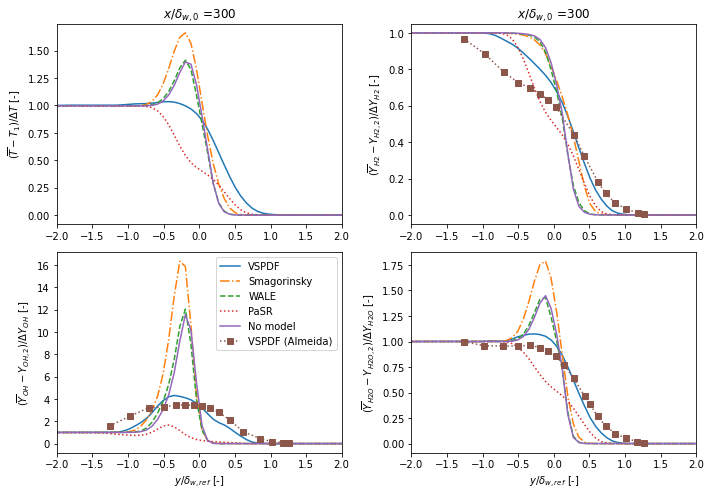

In [8]:
# Plot normalised T, Y with *ref* theta
plt.figure(figsize=(10,7))

tref = np.loadtxt("ref_data/theta_w.dat", comments="#", delimiter=",")
tref = np.sort(tref, axis=0)
theta = np.interp(xpos, tref[:,0], tref[:,1])*eta*theta0 + theta0

for i in range(len(fstarts)):
  plot_TY(fstarts[i], fends[i], xpos, theta, flabels[i], fstyles[i])

# Plot ref
plt.subplot(2,2,1)
plt.ylabel(r"$(\overline{T}-T_1)/\Delta T$ [-]")
plt.xlim([-2, 2])
plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

for i in range(len(spec_names)):
  spec = spec_names[i]
  
  ref = np.loadtxt(f"ref_data/meanY"+spec+"_"+str(xpos), comments="#", delimiter=",")
  if (spec == "H2"):
    ref[:,1] = 1 - ref[:,1]

  plt.subplot(2,2,i+2)
  plt.plot(ref[:,0], ref[:,1], 's:', label="VSPDF (Almeida)")

  ylab = "$(\overline{Y}_{"+spec+"} - Y_{"+spec+",2})/\Delta Y_{"+spec+"}$ [-]"
  plt.ylabel(r"%s"%ylab)
  plt.xlim([-2.0, 2.0])
  if i == 1 or i == 2:
    plt.xlabel(r"$y/\delta_{w, ref}$ [-]")
  if i == 0:
    plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))
  if i == 1:
    plt.legend()

plt.tight_layout()

In [9]:
# # Plot normalised Y
# plt.figure(figsize=(5,10))
# for i in range(len(spec_names)):
#   spec = spec_names[i]
#   dY = Y_vs[i][0] - Y_vs[i][-1]
#   Y2 = Y_vs[i][-1]
  
#   ref = np.loadtxt(f"ref_data/meanY"+spec+"_"+str(xpos), comments="#", delimiter=",")
#   if (spec == "H2"):
#     ref[:,1] = 1 - ref[:,1]

#   plt.subplot(3,1,i+1)
#   plt.plot(y_vs/theta_vs[ipos], (Y_vs[i]-Y2)/dY, label="VSPDF")
#   plt.plot(y_sp/theta_sp[ipos], (Y_sp[i]-Y2)/dY, label="Smagorinsky+PaSR")
#   plt.plot(y_smag/theta_smag[ipos], (Y_smag[i]-Y2)/dY, label="Smagorinsky")
#   plt.plot(y_nm/theta_nm[ipos], (Y_nm[i]-Y2)/dY, '--', label="No model")
#   plt.plot(ref[:,0], ref[:,1], 's:', label="VSPDF (Yuri)")
#   ylab = "$(\overline{Y}_{"+spec+"} - Y_{"+spec+",2})/\Delta Y_{"+spec+"}$ [-]"
#   plt.ylabel(r"%s"%ylab)
#   plt.xlim([-2.0, 2.0])
#   # plt.legend()
#   if i == 2:
#     plt.xlabel(r"$y/\delta_w$ [-]")
#   if i == 0:
#     plt.title(r"$x/\delta_{w,0}$ =" + str(xpos))

# plt.tight_layout()